Antes de usar nltk, si se genera un error de certificado al descargar archivos
bash '/Applications/Python 3.11/Install Certificates.command' en linux/mac

In [718]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [719]:
from keras.models import Sequential
import numpy as np
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import SimpleRNN, Dense, Input, LSTM, GRU, Embedding, Attention, Flatten
from keras.models import Model
import pandas as pd
import string
import datetime
import tensorflow as tf

In [720]:
from nltk.tokenize import sent_tokenize, word_tokenize

Import the dataset "datase/dataset_elpino.csv"

In [721]:
dataset = pd.read_csv("dataset/dataset_elpino_clean.csv", sep=";")

In [722]:
sexmap = {'Hombre': 1, 'Mujer': 0}

In [723]:
dataset

,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,...,P25,P26,P27,P28,P29,P30,Age,Sex,GRD,CLASS
0,A41.8 - Otras septicemias especificadas,B37.6 - Endocarditis debida a candida (I39.8*),"I39.8 - Endocarditis, válvula no especificada,...",N10 - Nefritis tubulointersticial aguda,B96.1 - Klebsiella pneumoniae [K. pneumoniae] ...,L89.9 - Úlcera de decúbito y area de presión n...,L08.9 - Infección local de la piel y del tejid...,B96.2 - Escherichia coli [E. coli] como causa ...,A41.5 - Sepsis por otros organnismos Gram nega...,J86.9 - Piotórax sin fístula,...,88.72 - ECOCARDIOGRAFIA,90.42 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTIVO,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.33 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA,40,Hombre,184103 - MH SEPTICEMIA W/MCC,18
1,"U07.1 - COVID-19, virus identificado",J12.8 - Neumonía debida a otros virus,R06.0 - Disnea,R05 - Tos,"R50.9 - Fiebre, no especificada",Z29.0 - Aislamiento,Z01.7 - Examen de laboratorio,"J96.00 - Insuficiencia respiratoria aguda, Tip...",J94.2 - Hemotórax,J92.9 - Paquipleuritis sin asbestosis,...,90.43 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTI...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,96.59 - IRRIGACION HERIDA OTRA,90.99 - EXAMEN MICROSCOPICO DIGESTIVO INFERIOR...,53,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...,4
2,K56.5 - Adherencias [bridas] intestinales con ...,R57.2 - Shock séptico,R57.1 - Choque hipovolémico,J80 - Síndrome de dificultad respiratoria del ...,Y95 - Afección nosocomial,J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,B95.6 - Staphylococcus aureus como causa de en...,B96.8 - Otros agentes bacterianos especificado...,B37.1 - Candidiasis pulmonar,...,91.73 - EXAMEN MICROSCOPICO HERIDA OPERATORIA....,90.53 - EXAMEN MICROSCOPICO SANGRE.CULTIVO Y S...,99.26 - INYECCION TRANQUILIZANTE,89.39 - OTRAS MEDICIONES Y EXAMENES NO QUIRURG...,89.66 - GASOMETRIA VENA,89.65 - GASOMETRIA ARTERIA,65,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...,4
3,K76.8 - Otras enfermedades especificadas del h...,K66.1 - Hemoperitoneo,"N18.5 - Enfermedad renal crónica, estadio 5",D64.9 - Anemia de tipo no especificado,E87.5 - Hiperpotasemia,E87.2 - Acidosis,J81 - Edema pulmonar,N17.8 - Otras insuficiencias renales agudas,J44.9 - Enfermedad pulmonar obstructiva crónic...,R41.0 - Desorientación no especificada,...,00.13 - INYECCION NESIRITIDE,00.17 - INFUSON AGENTE VASOPRESOR,99.04 - TRANSFUSION CONCENTRADO HEMATIES,99.18 - INYECCION ELECTROLITO,99.21 - INYECCION ANTIBIOTICO,99.23 - INYECCION ESTEROIDE,61,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...,4
4,T81.0 - Hemorragia y hematoma que complican un...,"Y83.2 - Operación quirúrgica con anastomosis, ...",S31.1 - Herida de la pared abdominal,S36.80 - Traumatismo de otros órganos intraabd...,W31.62 - Contacto traumático con otras maquina...,"J96.09 - Insuficiencia respiratoria aguda, Tip...",J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,"U07.1 - COVID-19, virus identificado","N39.0 - Infección de vías urinarias, sitio no ...",...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,93.90 - RESPIRACION PRESION POSITIVA CONTINUA ...,99.15 - INFUSION PARENTERAL SUSTANCIA NUTRITIV...,96.59 - IRRIGACION HERIDA OTRA,45.13 - ESOFAGOGASTRODUODENOSCOPIA [EGD],30,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14556,E10.1 - Diabetes mellitus tipo 1 con cetoacidosis,"J45.9 - Asma, no especificada",F10.2 - Trastornos mentales y del comportamien...,F17.2 - Trastornos mentales y del comportamien...,Z91.1 - Historia personal de incumplimiento de...,-,-,-,-,-,...,-,-,-,-,-,-,26,Mujer,104101 - MH 

                                                 D01  \
0            A41.8 - Otras septicemias especificadas   
1               U07.1 - COVID-19, virus identificado   
2  K56.5 - Adherencias [bridas] intestinales con ...   
3  K76.8 - Otras enfermedades especificadas del h...   
4  T81.0 - Hemorragia y hematoma que complican un...   

                                                 D02  \
0     B37.6 - Endocarditis debida a candida (I39.8*)   
1              J12.8 - Neumonía debida a otros virus   
2                              R57.2 - Shock séptico   
3                              K66.1 - Hemoperitoneo   
4  Y83.2 - Operación quirúrgica con anastomosis, ...   

                                                 D03  \
0  I39.8 - Endocarditis, válvula no especificada,...   
1                                     R06.0 - Disnea   
2                        R57.1 - Choque hipovolémico   
3        N18.5 - Enfermedad renal crónica, estadio 5   
4               S31.1 - Herida de la pared abd

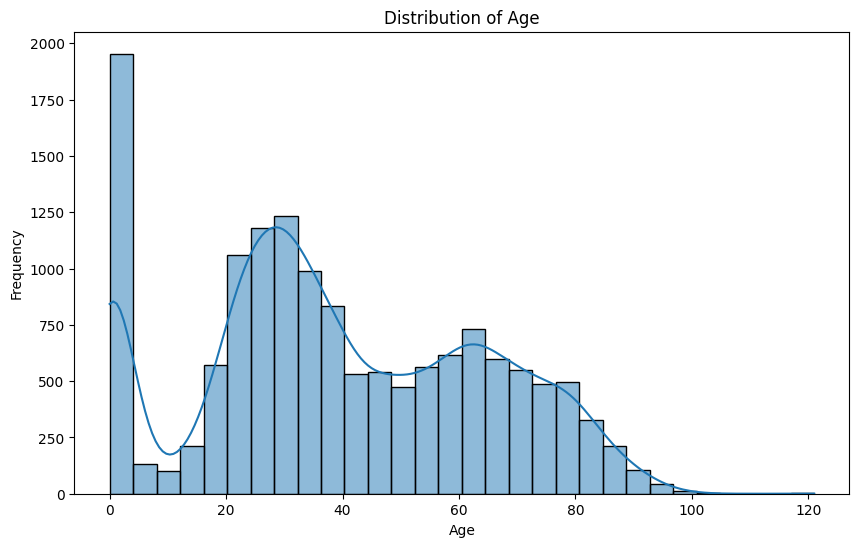

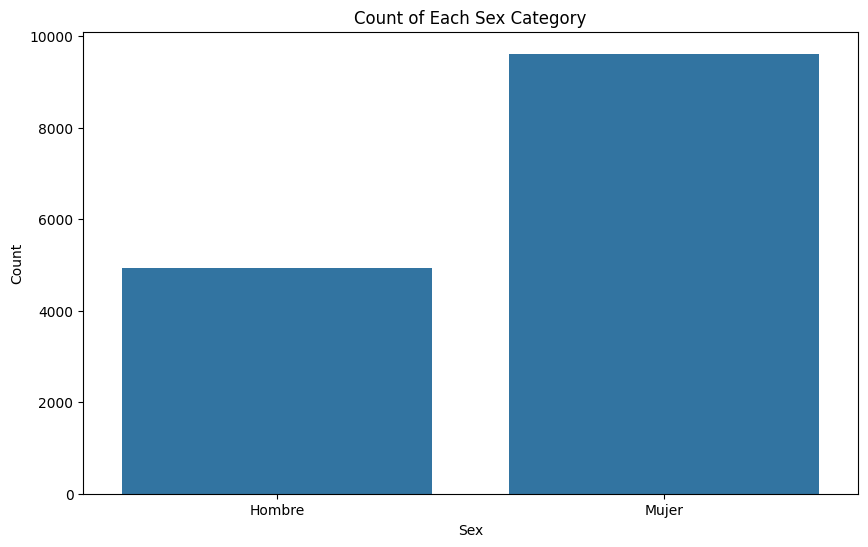

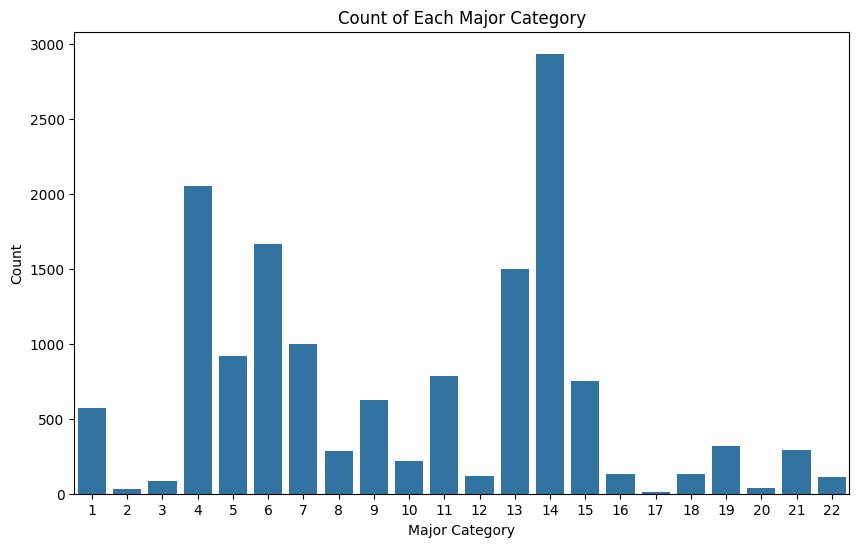

,CLASS,Count
0,14,2934
1,4,2049
2,6,1668
3,13,1497
4,7,996
5,5,917
6,11,782
7,15,753
8,9,622
9,1,573


In [724]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print(dataset.head())

# Display the summary statistics of the dataset
print(dataset.describe(include='all'))

# Check for missing values in the dataset
print(dataset.isnull().sum())

# Display the data types of each column
print(dataset.dtypes)

# Plot the distribution of the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the count of each category in the 'Sex' column with correct labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=dataset)
plt.title('Count of Each Sex Category')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=[key for key, value in sexmap.items()])
plt.show()

# Plot the count of each category in the 'MajorCategory' column
plt.figure(figsize=(10, 6))
sns.countplot(x='CLASS', data=dataset)
plt.title('Count of Each Major Category')
plt.xlabel('Major Category')
plt.ylabel('Count')
plt.show()

# Create a table with the count of occurrences by MajorCategory
major_category_counts = dataset['CLASS'].value_counts().reset_index()
major_category_counts.columns = ['CLASS', 'Count']
major_category_counts


In [725]:
# Step 1: Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Embedding

# Step 2: Load the dataset
# Replace 'your_dataset.csv' with your actual dataset file
data = dataset[dataset['Age'] > 1]
#data = data[data['Sex'] == 'Mujer']

In [726]:
# Step 3: Preprocessing the data

# Tokenize diagnostics and procedures
diagnostic_cols = [f'D{i:02d}' for i in range(1, 36)]  # D01 to D35
procedure_cols = [f'P{i:02d}' for i in range(1, 31)]  # P01 to P30

In [727]:
# Initialize Tokenizer
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words based on vocabulary size

# Combine all diagnostic and procedure columns into one list of text
all_text = data[diagnostic_cols + procedure_cols].fillna('').values.flatten()
tokenizer.fit_on_texts(all_text)
data['all_text'] = data[diagnostic_cols + procedure_cols].fillna('').agg(' '.join, axis=1)

C:\Users\crist\AppData\Local\Temp\ipykernel_68400\1954613548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['all_text'] = data[diagnostic_cols + procedure_cols].fillna('').agg(' '.join, axis=1)


In [728]:
data['all_text'] = tokenizer.texts_to_sequences(data['all_text'].fillna(''))


C:\Users\crist\AppData\Local\Temp\ipykernel_68400\1380622751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['all_text'] = tokenizer.texts_to_sequences(data['all_text'].fillna(''))


In [729]:
data['all_text'] = pad_sequences(data['all_text'], maxlen=500, padding='post')


C:\Users\crist\AppData\Local\Temp\ipykernel_68400\1967833358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['all_text'] = pad_sequences(data['all_text'], maxlen=500, padding='post')


In [730]:
# Step 4: Encoding categorical variables
# Encode Sex and Class if they are categorical
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

C:\Users\crist\AppData\Local\Temp\ipykernel_68400\1186414943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = label_encoder.fit_transform(data['Sex'])
C:\Users\crist\AppData\Local\Temp\ipykernel_68400\1186414943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLASS'] = label_encoder.fit_transform(data['CLASS'])


In [731]:
# Encode the GRD target variable
y = label_encoder.fit_transform(data['GRD'])
y

array([427,  55,  55, ..., 202, 301,  63])

In [732]:
# Step 5: Prepare the input data
# Combine diagnostic, procedure columns, and other features into one input array
X = np.concatenate([data['all_text'].values.reshape(-1, 1), data[['Age', 'Sex', 'CLASS']].values], axis=1)


In [733]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [834]:
# Step 7: Build the RNN model
vocab_size = 5000  # Adjust based on your actual vocabulary size
embedding_dim = 8192  # Dimension of the embedding vector

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]))  # Embedding layer
model.add(SimpleRNN(512, activation='relu'))  # RNN layer
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))  # Dense layer
model.add(Dense(600, activation='softmax'))  # Output layer


In [835]:
# Step 8: Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [836]:
# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.1877 - loss: 4.7631 - val_accuracy: 0.3767 - val_loss: 2.7503
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.3944 - loss: 2.3857 - val_accuracy: 0.4304 - val_loss: 2.1077
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.4687 - loss: 1.8019 - val_accuracy: 0.4570 - val_loss: 1.8661
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.5030 - loss: 1.5229 - val_accuracy: 0.4739 - val_loss: 1.7714
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.5477 - loss: 1.3174 - val_accuracy: 0.4845 - val_loss: 1.7453
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.5923 - loss: 1.1704 - val_accuracy: 0.4971 - val_loss: 1.7475
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.6285 - loss: 1.0472 - val_accuracy: 0.4826 - val_loss: 1.7708
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.6610 - loss: 0.9415 - val_accuracy: 0.

In [837]:
# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4372 - loss: 2.8739
Test Loss: 2.811809778213501
Test Accuracy: 0.4508894085884094


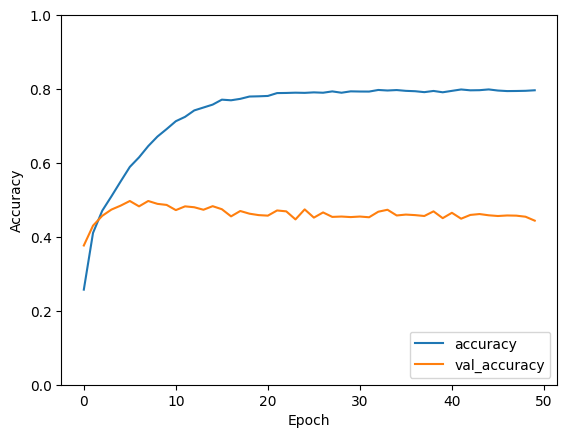

In [838]:
# Step 11: Plotting the training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()